In [90]:
# TIME SERIES FORECASTING:

## Crime events in Miami Dade County, 
## The Police Chief of Miami Dade wants to predict how many Crimes should he expect next year to accordingly adjust 
## the Police presence on such important city.
## Based on the data of the previous years (months/days), we will use time series forecasting to get an approximate events of crimes. 
## Forecasted value of Crimes will help the Police Chief to can plan things accordingly to can provide a safety county for the tourists and residents.

## Time series analysis is a specialized branch of statistics used extensively in fields such as Econometrics & Operation Research.

In [126]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from math import sqrt

from datetime import datetime

from statsmodels.tsa.api import ExponentialSmoothing

from sklearn.metrics import mean_squared_error



In [127]:
# # Problem Statement and Dataset:

# We are provided a Time Series problem involving prediction of number of Crimes in Miami Dade County, 
# We are provided with 2 years of data(Aug 2012-Sept 2014) 
# and using this data we have to forecast the number of commuters for next 7 months.

In [128]:
# Read the CLEAN data From 2015-05 to 2019-06 csv file into a pandas DataFrame

df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08-01,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0
1,4,2015-09-01,803,121,132.0,13.0,91.0,28.0,22.0,13.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0
2,5,2015-10-01,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0
3,6,2015-11-01,774,114,153.0,15.0,112.0,26.0,24.0,17.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0
4,7,2015-12-01,891,129,121.0,11.0,84.0,26.0,13.0,22.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0


In [129]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [130]:
# Our Data has 50 months from 2015-05 to 2019-06.
# the data 
train=df[0:41]
test=df[41:] 

In [131]:
train.head()

,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,2015-08-01,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0
1,2015-09-01,803,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0
2,2015-10-01,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0
3,2015-11-01,774,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0
4,2015-12-01,891,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0


In [132]:
train.tail()

,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
36,2018-08-01,850,126,146.0,15.0,105.0,26.0,14.0,17.0,41.0,...,18.0,12.0,20.0,139.0,0.0,0.0,0.0,7.0,53.0,79.0
37,2018-09-01,745,123,124.0,17.0,83.0,24.0,13.0,17.0,14.0,...,15.0,16.0,15.0,126.0,0.0,0.0,0.0,7.0,43.0,76.0
38,2018-10-01,922,135,139.0,18.0,88.0,33.0,24.0,21.0,25.0,...,17.0,19.0,20.0,123.0,0.0,0.0,0.0,7.0,38.0,78.0
39,2018-11-01,795,124,126.0,18.0,85.0,23.0,16.0,14.0,20.0,...,20.0,10.0,10.0,0.0,0.0,0.0,135.0,8.0,39.0,88.0
40,2018-12-01,818,121,123.0,12.0,89.0,22.0,8.0,15.0,18.0,...,20.0,11.0,15.0,0.0,0.0,0.0,124.0,8.0,45.0,71.0


In [133]:
test.head()

,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
41,2019-01-01,982,155,135.0,16.0,97.0,22.0,23.0,9.0,33.0,...,13.0,26.0,18.0,0.0,0.0,0.0,121.0,8.0,46.0,67.0
42,2019-02-01,934,145,124.0,13.0,84.0,27.0,10.0,17.0,22.0,...,24.0,18.0,11.0,0.0,0.0,155.0,0.0,10.0,54.0,91.0
43,2019-03-01,932,139,121.0,23.0,80.0,18.0,13.0,13.0,21.0,...,16.0,10.0,18.0,0.0,0.0,145.0,0.0,10.0,40.0,95.0
44,2019-04-01,880,131,155.0,23.0,100.0,32.0,23.0,20.0,24.0,...,32.0,10.0,19.0,0.0,0.0,139.0,0.0,9.0,38.0,92.0
45,2019-05-01,1007,149,145.0,22.0,92.0,31.0,14.0,18.0,38.0,...,13.0,14.0,14.0,0.0,131.0,0.0,0.0,13.0,23.0,95.0


In [134]:
test.tail()

,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
42,2019-02-01,934,145,124.0,13.0,84.0,27.0,10.0,17.0,22.0,...,24.0,18.0,11.0,0.0,0.0,155.0,0.0,10.0,54.0,91.0
43,2019-03-01,932,139,121.0,23.0,80.0,18.0,13.0,13.0,21.0,...,16.0,10.0,18.0,0.0,0.0,145.0,0.0,10.0,40.0,95.0
44,2019-04-01,880,131,155.0,23.0,100.0,32.0,23.0,20.0,24.0,...,32.0,10.0,19.0,0.0,0.0,139.0,0.0,9.0,38.0,92.0
45,2019-05-01,1007,149,145.0,22.0,92.0,31.0,14.0,18.0,38.0,...,13.0,14.0,14.0,0.0,131.0,0.0,0.0,13.0,23.0,95.0
46,2019-06-01,697,109,139.0,26.0,84.0,29.0,15.0,13.0,26.0,...,15.0,22.0,20.0,0.0,149.0,0.0,0.0,11.0,45.0,93.0


In [135]:
# Drop innecesary columns
test = test[["Booking_year_month", "total_crime_3"]]
test.head()

,Booking_year_month,total_crime_3
41,2019-01-01,135.0
42,2019-02-01,124.0
43,2019-03-01,121.0
44,2019-04-01,155.0
45,2019-05-01,145.0


In [136]:
train.to_csv("Resources/train.csv",index=True,header=True)
test.to_csv("Resources/test.csv",index=True,header=True)

In [137]:
#train.dtypes

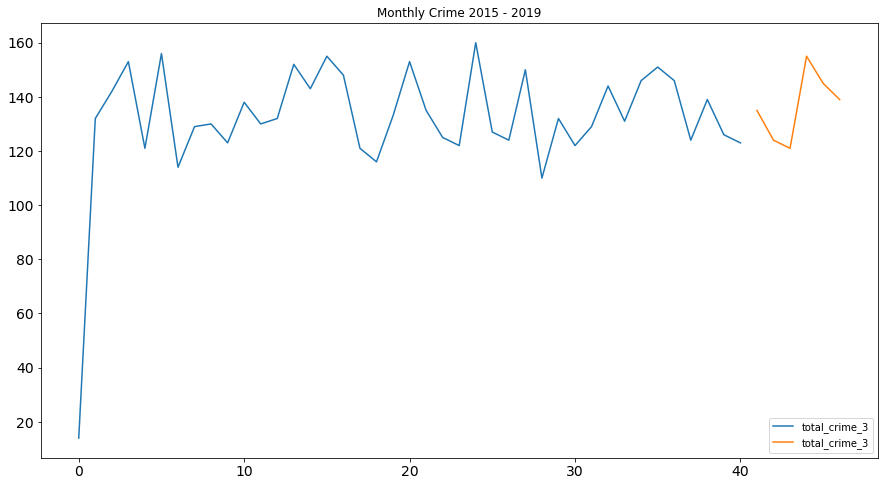

In [138]:
#Plotting data
train.total_crime_3.plot(figsize=(15,8), title= 'Monthly Crime 2015 - 2019', fontsize=14)
test.total_crime_3.plot(figsize=(15,8), title= 'Monthly Crime 2015 - 2019', fontsize=14)
plt.legend(loc='best')
#plt.show()

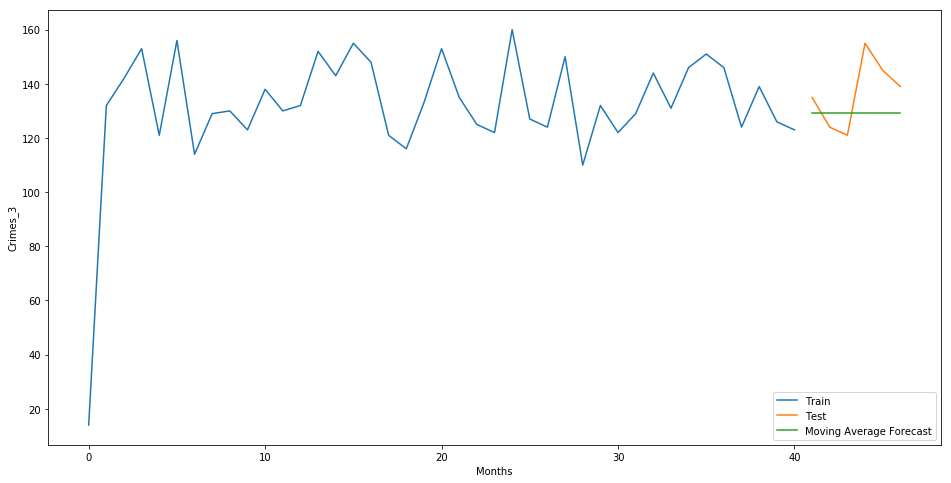

In [139]:

# este es el codigo de un ejercicio de moving average pero no se si la matriz de ellos esta organizada como la nuestra:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['total_crime_3'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['total_crime_3'], label='Train')
plt.plot(test['total_crime_3'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.xlabel("Months")
plt.ylabel("Crimes_3")
plt.legend(loc='best')
plt.show()

In [140]:
y_hat_avg['moving_avg_forecast']

41    129.333333
42    129.333333
43    129.333333
44    129.333333
45    129.333333
46    129.333333
Name: moving_avg_forecast, dtype: float64

In [141]:
rms = sqrt(mean_squared_error(test.total_crime_3, y_hat_avg.moving_avg_forecast))
print(rms)

13.709283148452522


In [30]:
# "# Assign the data to X and y
# X = df.Booking_year_month.values.reshape(-1, 1)
# y = df.total_crime.values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)
# X"

In [142]:
# Naive Forecast

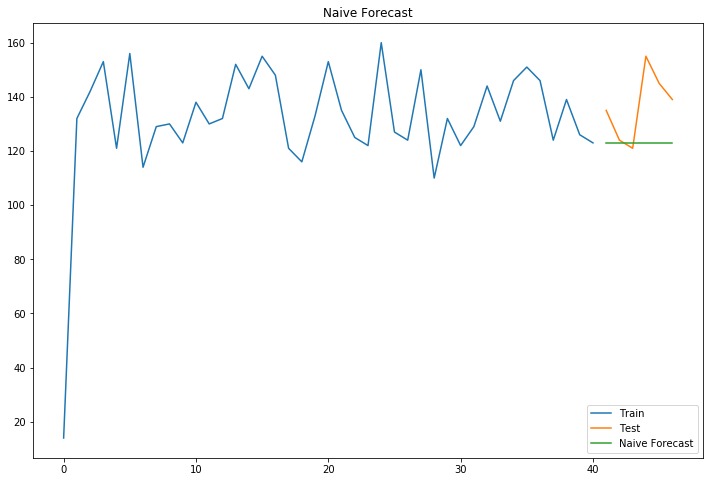

In [143]:
dd= np.asarray(train.total_crime_3)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['total_crime_3'], label='Train')
plt.plot(test.index,test['total_crime_3'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()